In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [28]:
data = pd.read_csv("C:\\Users\\SRIRAM\\Desktop\\DLCVNLP\\Practice Datasets\\mushrooms.csv")

In [29]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [30]:
data.shape

(8124, 23)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [32]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [33]:
data.describe(include = 'all').transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [34]:
data = data.drop(["veil-type"], axis = 1)

In [35]:
# Separating the Dependent and Independent variables
features = data.columns
target = 'class'
features = list(features.drop(target))
features

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

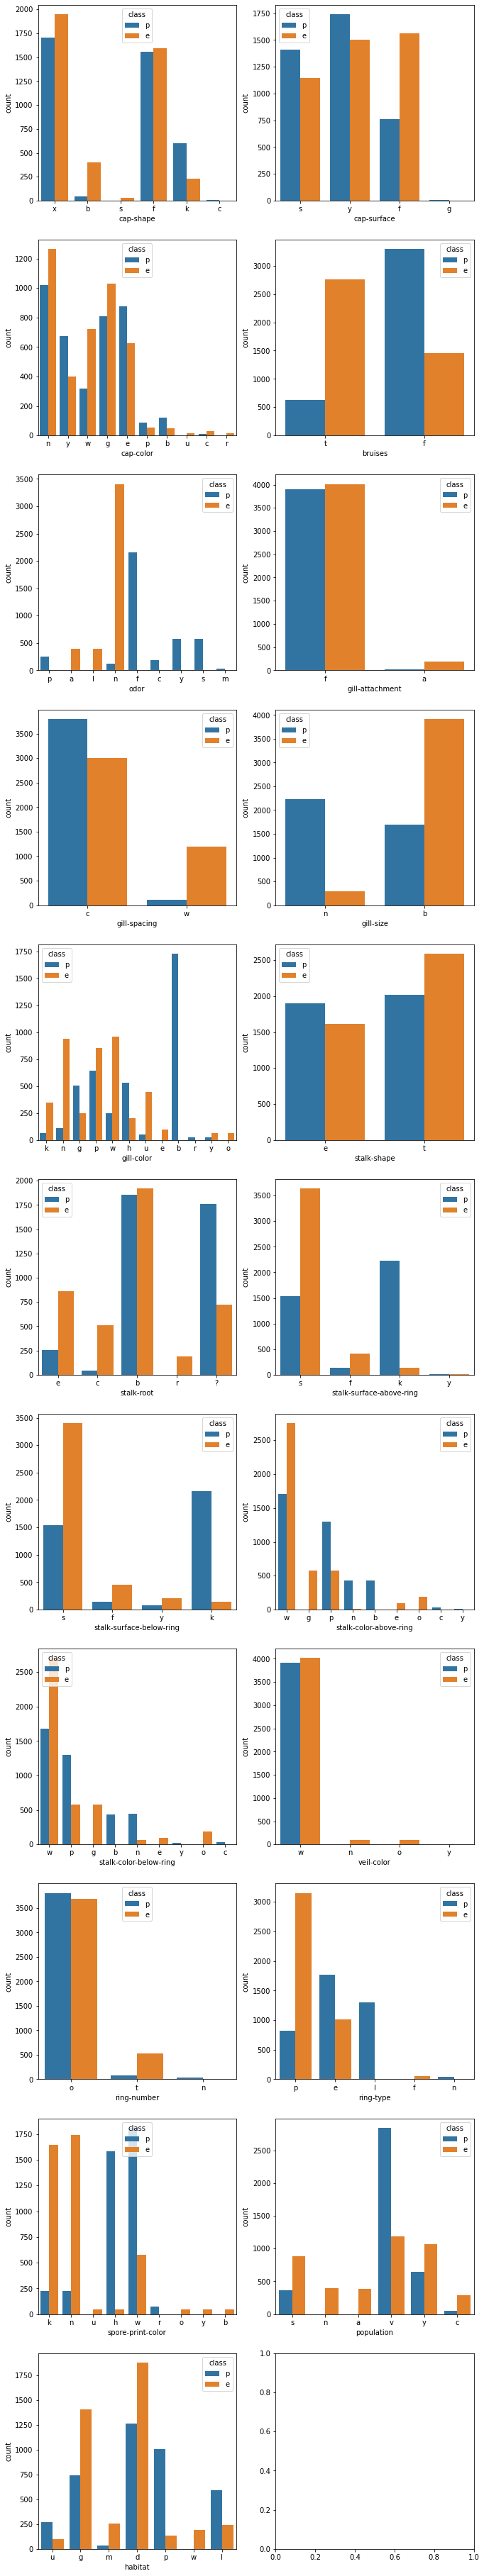

In [36]:
fig, ax = plt.subplots(nrows = 11, ncols = 2, figsize = (11, 66))
for f, ax in zip(features, ax.ravel()):
    sns.countplot(x = f, hue = 'class', data = data, ax = ax)

In [37]:
# LabelEncoding
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()
for col in data.columns:
    data[col] = labelEncoder.fit_transform(data[col])

In [38]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
class,8124.0,0.482029,0.499708,0.0,0.0,0.0,1.0,1.0
cap-shape,8124.0,3.348104,1.604329,0.0,2.0,3.0,5.0,5.0
cap-surface,8124.0,1.827671,1.229873,0.0,0.0,2.0,3.0,3.0
cap-color,8124.0,4.504677,2.545821,0.0,3.0,4.0,8.0,9.0
bruises,8124.0,0.415559,0.492848,0.0,0.0,0.0,1.0,1.0
odor,8124.0,4.144756,2.103729,0.0,2.0,5.0,5.0,8.0
gill-attachment,8124.0,0.974151,0.158695,0.0,1.0,1.0,1.0,1.0
gill-spacing,8124.0,0.161497,0.368011,0.0,0.0,0.0,0.0,1.0
gill-size,8124.0,0.309207,0.462195,0.0,0.0,0.0,1.0,1.0
gill-color,8124.0,4.810684,3.540359,0.0,2.0,5.0,7.0,11.0


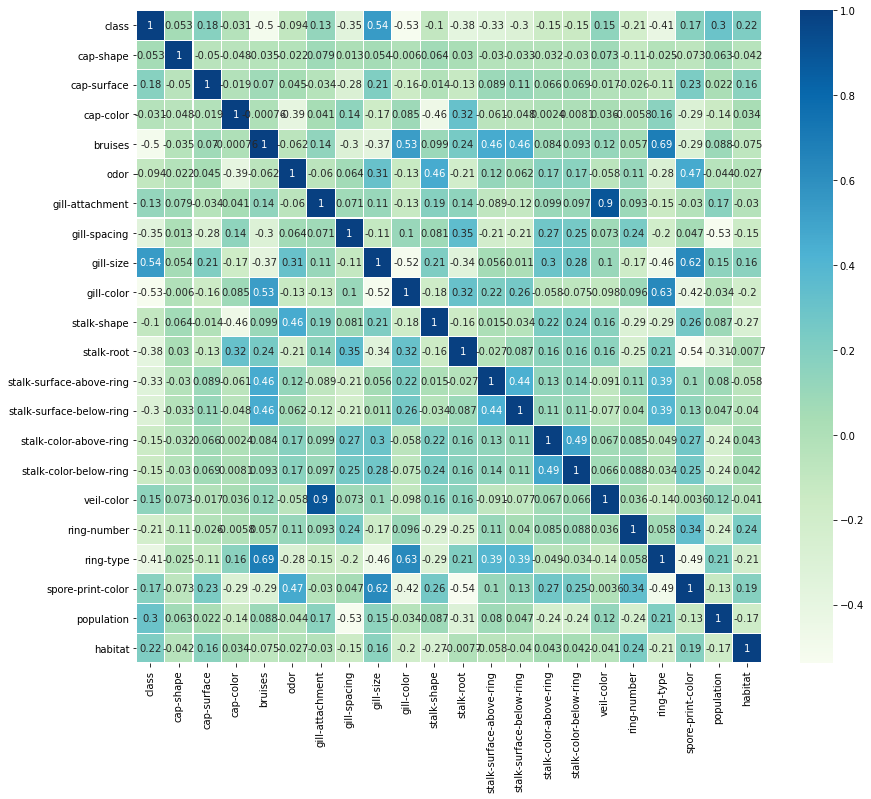

In [39]:
plt.figure(figsize = (14, 12))
sns.heatmap(data.corr(), linewidths = 0.1, cmap = 'GnBu', annot = True)

In [43]:
threshold = 0.5
a = abs(data.corr()['class'])
result = a[a > 0.5]
result

class         1.000000
bruises       0.501530
gill-size     0.540024
gill-color    0.530566
Name: class, dtype: float64

In [14]:
# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, features], data.loc[:, target],
                                                   test_size = 0.3, random_state = 0)
print('Train data set', X_train.shape)
print('Test data set', X_test.shape)

Train data set (5686, 21)
Test data set (2438, 21)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import pickle

loaded_model = pickle.load(open("C:\\Users\\SRIRAM\\xgb_finalized_model.sav", 'rb'))
loaded_model.fit(X_train, y_train)
y_pred = loaded_model.predict(X_test)
print(classification_report(y_test, y_pred))

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector

feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=10,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [23]:
features = feature_selector.fit(np.array(X_train.fillna(0)), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   28.8s finished

[2021-01-10 21:34:09] Features: 1/10 -- score: 0.9870823111804294[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   28.0s finished

[2021-01-10 21:34:37] Features: 2/10 -- score: 0.9990637806203995[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   26.7s finished

[2021-01-10 21:35:04] Features: 3/10 -- score: 0.9999526906768933[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [24]:
filtered_features= X_train.columns[list(features.k_feature_idx_)]
filtered_features

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

In [26]:
clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(X_train[filtered_features], y_train)

train_pred = clf.predict_proba(X_train[filtered_features])
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, train_pred[:,1])))

test_pred = clf.predict_proba(X_test[filtered_features])
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, test_pred [:,1])))

Accuracy on training set: 0.997381966807035
Accuracy on test set: 0.9973987831321403


In [ ]:
import pickle

loaded_model = pickle.load(open("C:\\Users\\SRIRAM\\xgb_finalized_model.sav", 'rb'))

In [ ]:
result = loaded_model.score(X_test, y_test)
print(result)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
# AUC
auc_roc = roc_auc_score(y_test, y_pred)
print('AUC using LR %0.3f' % (auc_roc))

In [ ]:
# Cross Validation
LR_eval = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 10)
LR_eval.mean()